# Active Layer Evaluation

This script contains the development of the figures to evaluate the performance of the active layer compared with the original IFC model.

In [1]:
%matplotlib inline 
import numpy as np 
import pylab as pl 
import pandas as pd 
from matplotlib import gridspec
from ifis_tools import series_tools as ser
from aclayer import core
import warnings
warnings.filterwarnings('ignore')

In [2]:
colors = {'ifc-hlm': '#d6604d',
         'a-hlm': '#92c5de',
         'd-hlm': '#225ea8'}

# Histograms of performance metrics

In [177]:
Ymet = pd.read_msgpack('data/results/Yearly_Metrics_sce.msg')

In [58]:
Ymet = pd.read_msgpack('data/results/Yearly_Metrics_sce.msg')
Ymet.head()

,product,kge,nse,vol,pbias,Hits,PeakDif,Qpeak,corr,best_corr,moves,meanRatio,stdRatio,Misses,link
2008,usgs,1.0,1.0,233017.174133,-0.0,1.0,0.0,760.3060,1.0,1.0,0,1.0,1.0,0.0,279554
2009,usgs,1.0,1.0,161455.760904,-0.0,1.0,0.0,338.3860,1.0,1.0,0,1.0,1.0,0.0,279554
2010,usgs,1.0,1.0,342954.078335,-0.0,1.0,0.0,551.4700,1.0,1.0,0,1.0,1.0,0.0,279554
2011,usgs,1.0,1.0,123070.611515,-0.0,1.0,0.0,181.5815,1.0,1.0,0,1.0,1.0,0.0,279554
2012,usgs,1.0,1.0,78513.364236,-0.0,1.0,0.0,308.6530,1.0,1.0,0,1.0,1.0,0.0,279554


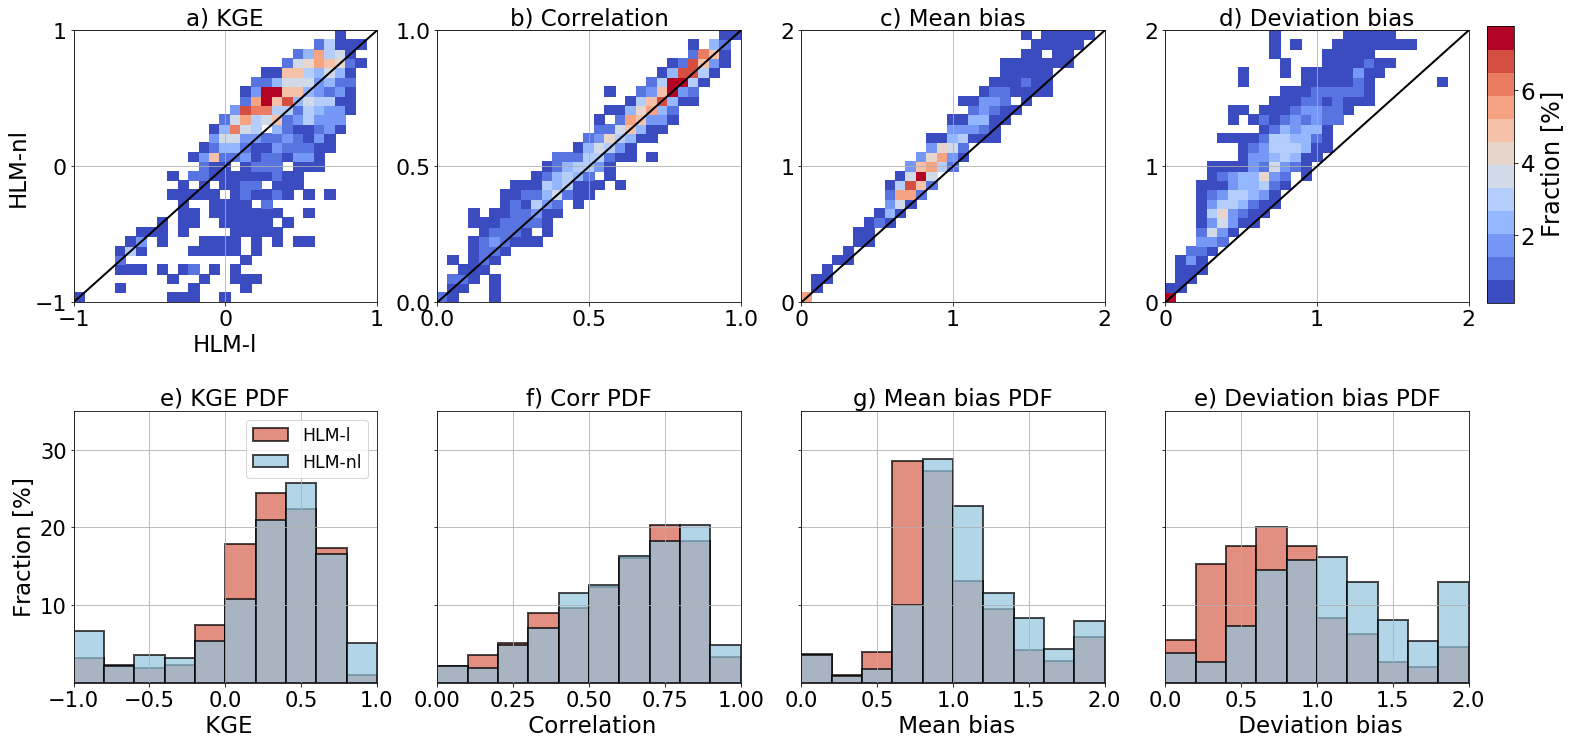

In [222]:
fig = pl.figure(figsize=(25,12))
gs = gridspec.GridSpec(2,4, height_ratios = [1,1.0])
cb_ax = fig.add_axes([.91,.565,.015,.32])
cmap = pl.get_cmap('coolwarm', 12) 

names = ['a) KGE','b) Correlation','c) Mean bias', 'd) Deviation bias']
names2 = ['e) KGE PDF','f) Corr PDF','g) Mean bias PDF','e) Deviation bias PDF']
Metrics2eval = ['kge','corr','meanRatio','stdRatio']
ranges = [[-1,1],[0,1],[0,2],[0,2]]
bins = [np.linspace(-1,1,30),np.linspace(0,1,30),np.linspace(0,2,30),np.linspace(0,2,30)]
bins2 = [np.arange(-1,1.2,0.2), np.arange(0,1.4,0.1), np.arange(0,2.2,0.2), np.arange(0,2.2,0.2)]
limits = [[-1, None], [None, None],[None, 2], [None,2]]
for i,met,ran,name,n2,bins_1, bins_2, limi in zip(range(4), Metrics2eval, ranges, names, names2,bins, bins2, limits):
    
    #Draw the 2d histogram
    ax = fig.add_subplot(gs[i])    
    
    a = Ymet[[met,'link']][Ymet['product'] == 'ifc-hlm']
    b = Ymet[[met,'link']][Ymet['product'] == 'a-hlm']
    idx = a.index.intersection(b.index)
    #Make the plot
    h = pl.hist2d(a.loc[idx][met], b.loc[idx][met], cmap = cmap,density = True,
              bins=bins_1, cmin = 0.05)    
    pl.plot([bins_1[0],bins_1[-1]],[bins_1[0],bins_1[-1]], 'k', lw = 2)
    ax.tick_params(labelsize = 22)
    if i == 3:
        cbar = fig.colorbar(h[-1], orientation = 'vertical', cax = cb_ax)            
        cbar.ax.tick_params(labelsize = 23)
        cbar.ax.set_ylabel('Fraction [$\%$]', size = 24)
        cbar.ax.set_yticks([0,2,4,6,8])
    ax.set_title(name, size = 23)
    if i > 0:
        ax.set_ylabel('')
        ax.set_xlabel('')        
    else:
        ax.set_ylabel('HLM-nl', size = 23)
        ax.set_xlabel('HLM-l', size = 23)
        
    ax.set_yticks(ax.get_xticks()[::2])
    ax.set_xticks(ax.get_yticks())
    ax.grid()
    
    
    #Draw the summary histogram
    ax = fig.add_subplot(gs[i+4])
    a = Ymet[[met,'link']][Ymet['product'] == 'ifc-hlm']    
    h,b = core.get_histogram(a[met], bins_2, inf=limi[0], sup = limi[-1])
    w = bins_2[1] - bins_2[0]
    ax.bar(b[:-1], h*100, w, color = colors['ifc-hlm'], alpha = 0.7, edgecolor = 'k', lw = 2, 
           align = 'edge', label = 'HLM-l')
    ax.set_xlim(ran[0],ran[1])
    ax.set_ylim(0,0.5)
    ax.tick_params(labelsize = 21)
    a = Ymet[[met,'link']][Ymet['product'] == 'a-hlm']
    h,b = core.get_histogram(a[met], bins_2, inf=limi[0], sup = limi[-1])
    ax.bar(b[:-1], h*100, w, color = colors['a-hlm'], alpha =0.7, edgecolor = 'k', lw = 2, align = 'edge',
          label = 'HLM-nl')
    ax.set_xlim(ran[0],ran[1])
    ax.set_ylim(0,35)
    ax.tick_params(labelsize = 21)
    ax.grid()
    ax.set_xlabel(name[2:], size = '23')
    ax.set_yticks([10,20,30])
    if i == 0:
        ax.set_ylabel('Fraction [$\%$]', size = 23)
        ax.legend(loc = 0, fontsize = 'xx-large')
    else:
        ax.set_yticklabels([])
    ax.set_title(n2, size = 23)
pl.subplots_adjust(wspace=0.2, hspace=0.4)
pl.savefig('figures/kge_active_vs_operational.png', bbox_inches = 'tight')

**Figure**: Effect of the Active layer equation formulation on the KGE performance of the model. Column a) KGE index, columns b to d correspond to the pearson correlation, mean ratio, and deviation ratio, the three components of the KGE index. 

Highlight of this figure:
- The active layer model produces an overall increase of the KGE.
- It also significantly increases the rate of stations that obtain a KGE near 1.0.
- However, there is also an increase of cases with KGE values equal or below -1.0.
- Regarding the components, the correlation has almost no changes.
- Moreover, the Active Layer model increases the rate of cases with mean and deviation ratio near 1.0.
- compared with the current IFC model, the active layer diminish greatly the mean ratios with rates below 1.0.

**Conclusion**: The active layer model does increase the model performance, it seems that this increase is obtained through a better representation of the Mean and deviation ratios. 

# Performance evolution with the area

In [211]:
areas = pd.read_csv('data/link_params/link_areas.csv', index_col=0)

In [212]:
def getPerc(t, p):    
    pos = np.where(np.isfinite(t))[0]
    forBox = []
    inter = []
    for ta in [[0,10],[10,100],[100,1000],[1000,10000],[10000,50000]]:
        p1 = np.where((are.values[pos]>ta[0]) & (are.values[pos]<ta[1]))[0]
        forBox.append(np.percentile(t[pos][p1], p))
    return forBox

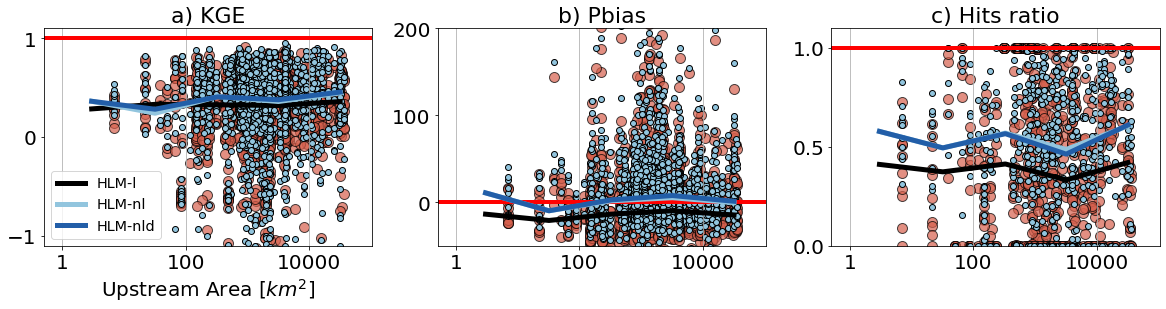

In [223]:
fig= pl.figure(figsize=(20,4))

B = Ymet.copy()
ylims = [[-1.1,1.1],[-50,200],[0,1.1]]
obj = [1.0, 0.0, 1.0]
#clrs = ['g', colors[-1]]
let=['a)','b)','c)']
yticks = [[-1, 0.0, 1],
         [0, 100, 200],
         [0.0, 0.5, 1.0]]
names = ['a) KGE', 'b) Pbias', 'c) Hits ratio']
for c, met in enumerate(['kge','pbias','Hits']):
    a = B[[met,'link']][B['product'] == 'ifc-hlm']
    b = B[[met,'link']][B['product'] == 'a-hlm']
    g = B[[met,'link']][B['product'] == 't-hlm']
    h = B[[met,'link']][B['product'] == 'd-hlm']
    idx = areas.index.intersection(a.link.astype(int))
    are = areas['area'][idx]
    
    ax = fig.add_subplot(1,3,c+1)
    pl.scatter(areas['area'][idx], a[met], c = colors['ifc-hlm'], edgecolors='k', s = 100, alpha = 0.7)
    pl.scatter(areas['area'][idx], b[met], c = colors['a-hlm'], edgecolors='k', alpha = 1.0)   
    
    box_pos = np.array([3.0, 32, 330, 3200, 32000])
    P = getPerc(a[met].values, 50)    
    ax.plot(box_pos, P, 'k', lw = 5, label = 'HLM-l')
    P = getPerc(b[met].values, 50)    
    ax.plot(box_pos, P, colors['a-hlm'], lw = 5, label = 'HLM-nl')
    P = getPerc(h[met].values, 50)    
    ax.plot(box_pos, P, colors['d-hlm'], lw = 5, label = 'HLM-nld')
    #P = getPerc(h[met].values, 50)    
    #ax.plot(box_pos, P, colors[1], lw = 5, label = 'D-HLM')
    
    
    ax.set_xscale('log')
    ax.hlines(obj[c], 0.5, 105000, lw = 4, colors='r')
    ax.set_ylim(ylims[c][0],ylims[c][-1])
    ax.set_xlim(0.5, 105000)
    ax.set_xticks([1,100,10000])
    ax.set_xticklabels([1, 100, 10000])
    ax.tick_params(labelsize = 20)
    ax.set_yticks(yticks[c])
    ax.grid(axis = 'x')
    ax.set_title(names[c], size = 22)
    if  c==0:
        ax.set_xlabel('Upstream Area [$km^2$]', size = 20)
        ax.legend(loc = 0, fontsize= 'x-large')
pl.subplots_adjust(wspace=0.2, hspace=0.2)
pl.savefig('figures/kge_pbias_hist_vs_area.png', bbox_inches = 'tight')

# Some events as an example 

In [3]:
flood = pd.read_csv('data/link_params/flood_levels.csv', index_col=0)
names = pd.read_csv('data/link_params/stations_names.csv', index_col=0)
usgs = pd.read_csv('data/link_params/usgs_codes.csv', index_col=0)

In [4]:
from ifis_tools import database_tools as db 

In [53]:
def plot_event(ax, link, name, legend = True, path = None, 
               f1 = '2016-08', f2 = '2016-11', timeFreq = '30d',ytext = None, text = None):
    qo = pd.read_msgpack('/Users/nicolas/BaseData/USGS_hourlyV2/'+str(link)+'.msg')
    #q2= pd.read_msgpack('/Users/nicolas/BaseData/HLM254v2/'+str(link)+'__.msg')
    q2 = pd.read_msgpack('/Users/nicolas/Tiles/State/outputs/254/st4/'+str(link)+'__.msg')
    
    try:
        fa = flood.loc[int(link)]['qaction']
        ta = 'action'
        ff = flood.loc[int(link)]['qflood']
        tf = 'flood'
        if fa > ff:
            fa = np.percentile(qo[np.isfinite(qo)], 96)
            ta = 'action'
            ff = np.percentile(qo[np.isfinite(qo)], 99)
            tf = 'flood'
    except:
        fa = np.percentile(qo[np.isfinite(qo)], 96)
        ta = 'action'
        ff = np.percentile(qo[np.isfinite(qo)], 99)
        tf = 'flood'
    
    pl.scatter(qo[f1:f2].index.to_pydatetime(), qo[f1:f2].values, c = 'k', s = 100, label = 'Observed')    
    
    #q1= pd.read_msgpack('/Users/nicolas/Tiles/State/outputs/302/st4/'+str(link)+'__.msg')  
    #pl.plot(q1['Q'][f1:f2].index, q1['Q'][f1:f2].values, c = colors['a-hlm'], lw = 4, label = 'Partially Drained')
    
    pl.plot(q2['Q'][f1:f2].index, q2['Q'][f1:f2].values, c = 'r', lw = 4, label = 'IFC Current')
    
    q1= pd.read_msgpack('/Users/nicolas/Tiles/State/outputs/sce/'+str(link)+'_0.02_4_.msg')  
    pl.plot(q1['Q'][f1:f2].index, q1['Q'][f1:f2].values, c = '#fda193', lw = 4, label = '4')
    
    q1= pd.read_msgpack('/Users/nicolas/Tiles/State/outputs/sce/'+str(link)+'_0.03_8_.msg')  
    pl.plot(q1['Q'][f1:f2].index, q1['Q'][f1:f2].values, c = '#a6d6f0', lw = 4,ls = '--', label = '8')
    
    q1= pd.read_msgpack('/Users/nicolas/Tiles/State/outputs/sce/'+str(link)+'_0.04_9_.msg')  
    pl.plot(q1['Q'][f1:f2].index, q1['Q'][f1:f2].values, c = '#2166ac', lw = 4, label = '9')
    
    q1= pd.read_msgpack('/Users/nicolas/Tiles/State/outputs/sce/'+str(link)+'_0.04_12_.msg')  
    pl.plot(q1['Q'][f1:f2].index, q1['Q'][f1:f2].values, c = '#2166ac', lw = 4,ls = '--', label = '12')
    
    
    pl.hlines(fa, f1,f2, colors = 'k',ls = '--', lw = 3)
    pl.text(f1, fa+ff/100, ta, size = 20)
    pl.hlines(ff, f1,f2, colors = 'r',ls = '--', lw = 3)
    pl.text(f1, ff+ff/100, tf, size = 20, color = 'r')
    ax.tick_params(labelsize = 22)
    area = db.SQL_Get_linkArea(link)
    if legend:
        ax.legend(loc = 'upper right', fontsize = 'xx-large')
    ax.set_ylabel('Streamflow [$m^3 \cdot s^{-1}$]', size = 24)
    title = '%s (%d $km^2$)' % (name, area)
    #title = '%s' % (name)
    ax.set_title(title, size = 24)
    ax.set_xlim(f1,f2)
    if ytext is not None:
        ax.text(0.0,ytext, text, size = 26)
    ax.set_xticks(pd.date_range(f1, f2,freq=timeFreq).to_pydatetime())
    ax.set_xticklabels(pd.date_range(f1, f2,freq=timeFreq).strftime('%Y-%m-%d'))
    #ax.ticklabel_format(axis = 'y', style='sci', scilimits = (1,3))
    if path is not None:
        pl.savefig(path, bbox_inches = 'tight')
    return ax

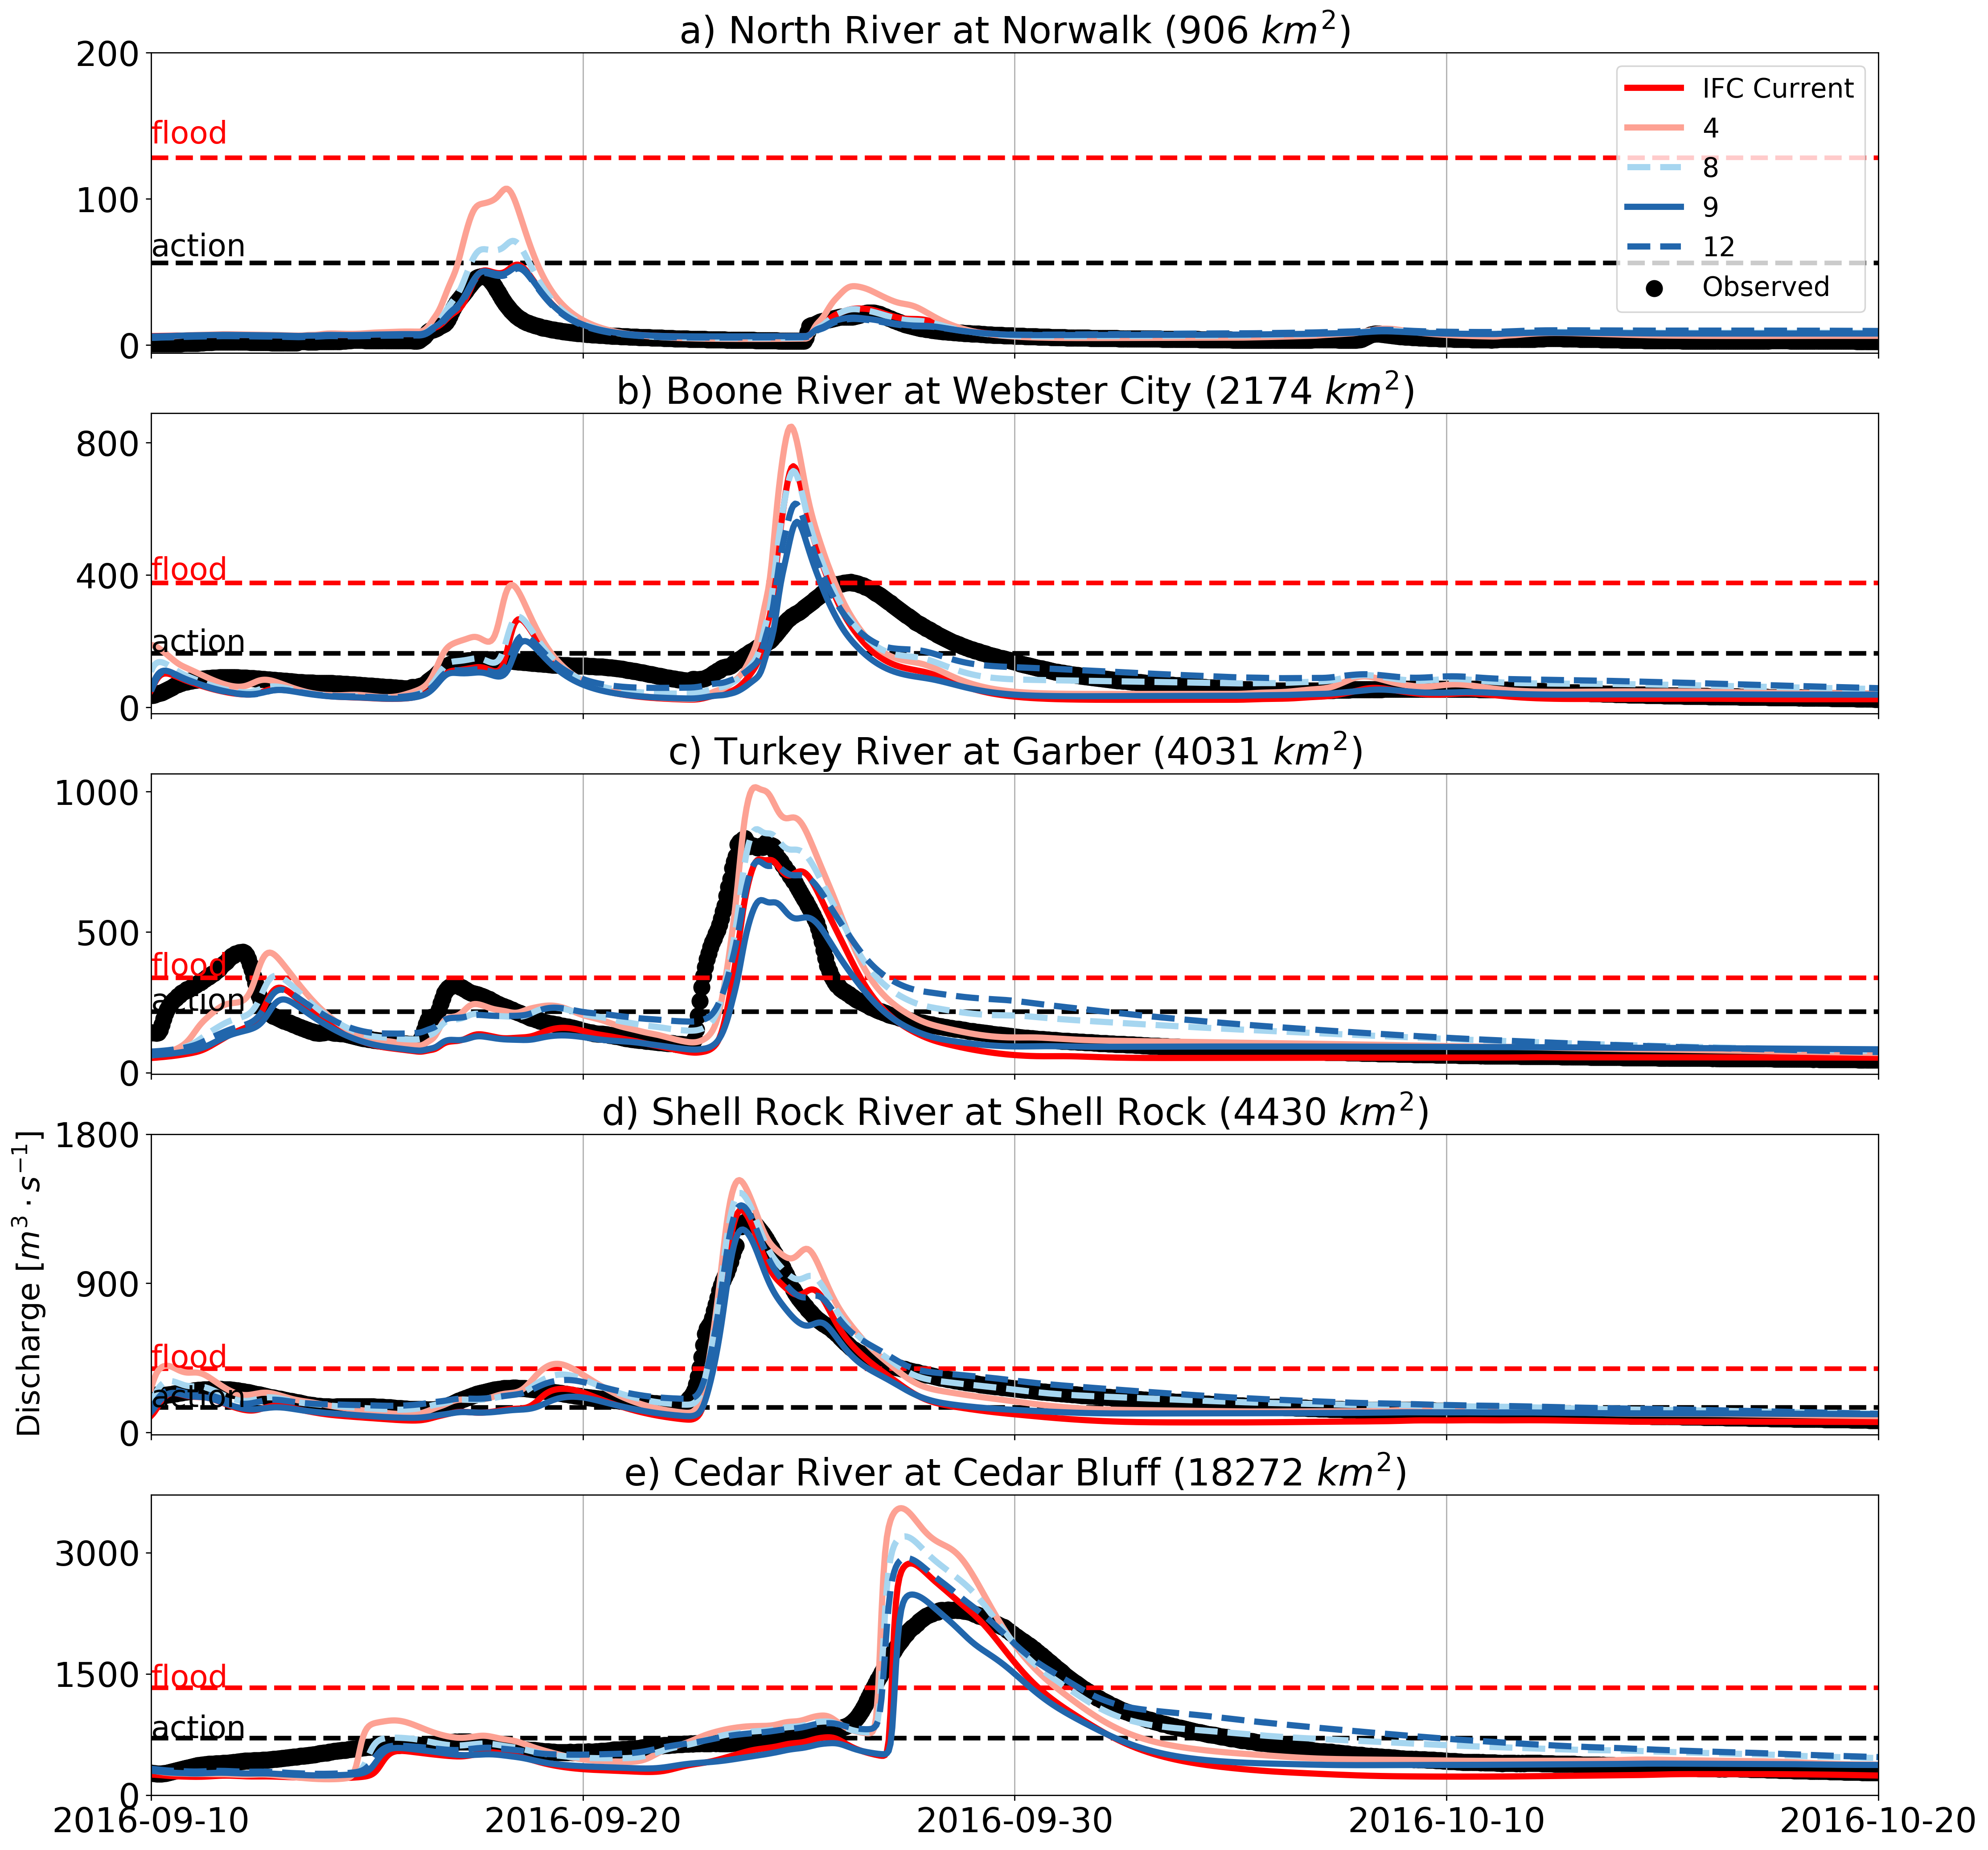

In [7]:
fig = pl.figure(figsize=(20,25), dpi=250)
legend = True
let = ['a)','b)','c)','d)','e)','f)']
yticks = [[0,100,200],         
        [0,400,800],
        [0,500,1000],         
        [0,900,1800],
        [0,1500,3000]]
ytexts = [240,1200,300,1200,2300,2500]
for c,code in enumerate([5486000,5481000,5412500,5462000,5464780]):#,'05464780']):
    ax = fig.add_subplot(6,1,c+1)
    n = names.loc[code]
    plot_event(ax, usgs.loc[code][0], let[c] +' '+n.river + ' at ' +n.town,legend=legend,
               f1 ='2016-09-10', f2 = '2016-10-20', timeFreq = '10d', )#ytext = 300, text = let[c])
    ax.set_ylabel('')
    #ax.text('2013-07-02 00:00', ytexts[c],let[c], size = 40)
    if c<4:
        ax.set_xticklabels([])
    if c == 3:
        ax.set_ylabel('Discharge [$m^3 \cdot s^{-1}$]', size = 20)
    ax.grid(axis = 'x')
    ax.set_yticks(yticks[c])
    legend = False
pl.savefig('figures/hydrographs.png', bbox_inches = 'tight')

In [36]:
usgs.loc[5451900]

link    255051
Name: 5451900, dtype: int64

In [37]:
qo = pd.read_msgpack('/Users/nicolas/BaseData/USGS_hourlyV2/255051.msg')

In [42]:
np.percentile(qo[np.isfinite(qo)],96)

6.457645499999979

In [ ]:
fig = pl.figure(figsize=(20,25), dpi=250)
legend = True
let = ['a)','b)','c)','d)','e)','f)']
yticks = [[0,100,200],         
        [0,400,800],
        [0,500,1000],         
        [0,900,1800],
        [0,1500,3000]]
ytexts = [240,1200,300,1200,2300,2500]
dates = {'5484500': ['2016-07-13', '2016-11-1'],
        '5387500': ['2016-07-13', '2016-11-1'],
        '5451900': ['2016-07-13', '2016-11-1'],
        '5462000' : ['2016-07-13', '2016-11-1'],
        '5459500': ['2016-07-13', '2016-11-1'],
        '5464780': ['2016-07-13', '2016-11-1'],
        '5451210': ['2016-07-13', '2016-11-1']}
for c,code in enumerate([5451900,5387500,5459500, 5462000,5464780]):#,'05464780']):
    ax = fig.add_subplot(5,1,c+1)
    n = names.loc[code]
    plot_event(ax, usgs.loc[code][0], let[c] +' '+n.river + ' at ' +n.town,legend=legend,
               f1 =dates[str(code)][0], f2 = dates[str(code)][1], timeFreq = '30d', )#ytext = 300, text = let[c])
    ax.set_ylabel('')
    #ax.text('2013-07-02 00:00', ytexts[c],let[c], size = 40)
    if c<4:
        ax.set_xticklabels([])
    if c == 3:
        ax.set_ylabel('Discharge [$m^3 \cdot s^{-1}$]', size = 20)
    ax.grid(axis = 'x')
    #ax.set_yticks(yticks[c])
    legend = False
#pl.savefig('figures/hydrographs.png', bbox_inches = 'tight')

# Select the best among three cases

In [215]:
Ymet = pd.read_msgpack('data/results/Yearly_Metrics_sce.msg')

In [216]:
products = Ymet['product'].unique().tolist()
products.pop(0)

'usgs'

In [217]:
#products = ['ifc-hlm','a-hlm','d-hlm','t-hlm']
Summaries = {}
Summaries.update({'kge': summary_metric(Ymet, products, 'kge')}) 
Summaries.update({'Hits': summary_metric(Ymet, products, 'Hits')}) 
Summaries.update({'moves': summary_metric(Ymet, products, 'moves','min',True)}) 

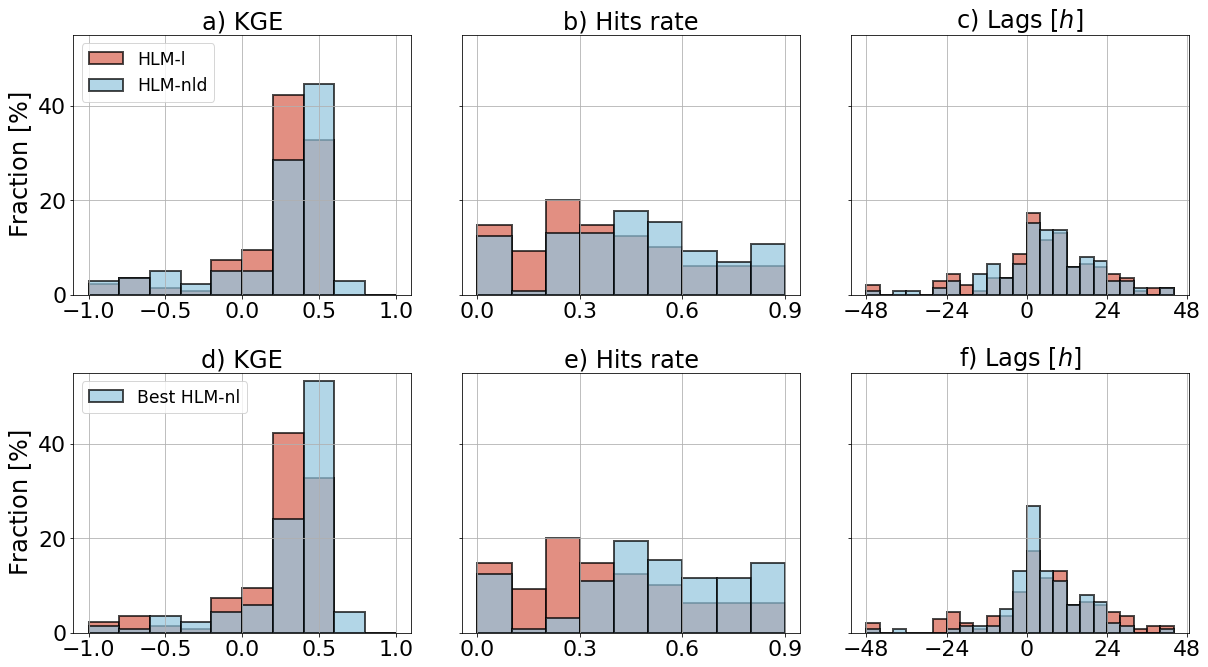

In [225]:
fig = pl.figure(figsize=(20,11))
c = 1
names = ['a) KGE', 'b) Hits rate','c) Lags [$h$]',
        'd) KGE', 'e) Hits rate','f) Lags [$h$]']
ranges = [np.arange(-1,1.2,0.2), np.arange(0,1,0.1), np.arange(-48,48,4)]
xticks = [[-1,-0.5,0,0.5,1.0],[0.0,0.3,0.6,0.9],[-48,-24,0,24,48]]
for maxmin,metric, ran,name,xt in zip(['max','max','min'],['kge','Hits','moves'], ranges, names, xticks):
    ax = fig.add_subplot(2,3,c)
    w = ran[1] - ran[0]
    h,b = core.get_histogram(Summaries[metric]['ifc-hlm'], ran, inf = ran[0], sup = ran[-1])
    pl.bar(b[:-1], h*100,w, align = 'edge', color = colors['ifc-hlm'], alpha = 0.7, edgecolor = 'k', lw = 2,
          label = 'HLM-l')
    h,b = core.get_histogram(Summaries[metric]['d-hlm'], ran, inf = ran[0], sup = ran[-1])
    pl.bar(b[:-1], h*100,w, align = 'edge', color = colors['a-hlm'], alpha = 0.7, edgecolor = 'k', lw = 2,
          label = 'HLM-nld')
    ax.tick_params(labelsize = 22)    
    ax.set_ylim(0,55)
    ax.grid()
    ax2 = fig.add_subplot(2,3,c+3)
    w = ran[1] - ran[0]
    h,b = core.get_histogram(Summaries[metric]['ifc-hlm'], ran, inf = ran[0], sup = ran[-1])
    pl.bar(b[:-1], h*100,w, align = 'edge', color = colors['ifc-hlm'], alpha = 0.7, edgecolor = 'k', lw = 2,
          label = '_IFC Current')
    h,b = core.get_histogram(Summaries[metric][maxmin+'_'+metric], ran, inf = ran[0], sup = ran[-1])
    pl.bar(b[:-1], h*100,w, align = 'edge', color = colors['a-hlm'], alpha = 0.7, edgecolor = 'k', lw = 2,
          label = 'Best HLM-nl')
    ax2.tick_params(labelsize = 22)    
    ax2.set_ylim(0,55)
    ax2.grid()    
    if c > 1:
        ax.set_yticklabels([])
        ax2.set_yticklabels([])
    else:
        ax.set_ylabel('Fraction [$\%$]', size = 24)
        ax2.set_ylabel('Fraction [$\%$]', size = 24)
        ax.legend(loc = 0, fontsize = 'xx-large')
        ax2.legend(loc = 0, fontsize = 'xx-large')
    ax.set_title(name, size = 24)
    ax2.set_title(names[c-1+3], size = 24)
    ax.set_xticks(xt)
    ax2.set_xticks(ax.get_xticks())
    
    c+=1
pl.subplots_adjust(wspace=0.15, hspace=0.3)
pl.savefig('figures/kge_hits_move_active_best.png', bbox_inches = 'tight')  